<a href="https://colab.research.google.com/github/anujoshi3390/Used-Car-Prediction-Model-India/blob/main/Capstone_Project_Reference_Notebook_Low_Code_Used_Cars_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

### **The objective:**

 - What is the intended goal?

### **The key questions:**

- What are the key questions that need to be answered?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for the Capstone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise.

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques.

### **Loading libraries**

In [ ]:
# Import libraries for data manipulation
import pandas as pd

import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

### **Let us load the data**

In [ ]:
df = pd.read_csv("used_cars.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'used_cars.csv'

### **Understand the data by observing a few rows**

In [ ]:
# View first 5 rows
df.head()

,S_No,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [ ]:
# View last 5 rows Hint: Use tail() method
df.tail()

,S_No,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


**Observations and Insights: _____**

### **Let us check the data types and and missing values of each column**

In [ ]:
# Check the datatypes of each column. Hint: Use info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S_No               7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [ ]:
# Check total number of missing values of each column. Hint: Use isnull() method
df.isnull()

,S_No,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,False,False,False,False,False,False,False,False,False,False,False,False,True,True
7249,False,False,False,False,False,False,False,False,False,False,False,False,True,True
7250,False,False,False,False,False,False,False,False,False,False,False,False,True,True
7251,False,False,False,False,False,False,False,False,False,False,False,False,True,True


**Observations and Insights: Some of the new price data values are missing  and some of the price values are missing.

There are 7253 records and 14 columns (varaibles).

We can observe that `S.No.` (serrial number) has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.

In [ ]:
# Remove S.No. column from data. Hint: Use inplace = True
df.drop(labels='S_No',axis=1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN


## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [ ]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
df.describe()

,S_No,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
count,7253.000000,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.280417,22.779692,9.479468
std,2093.905084,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.809277,27.759344,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,3.910000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000
max,7252.000000,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000


**Observations and Insights:Observations and Insights:

Years tells us that we have cars manufactured as old as 1996 to as new as 2019.25% marks tells us that only 25% of cars are the ones that were manufactured before 2011. kilometers driven has huge variation in data with values as low as 171 to as big as 6500000, 75% of cars were driven less than 73000 which is good and gives us a hint that the max value is most probably an outlier. Mileage has min vlaue of 0 which seems to be wrong we need to further check it, rest values of mileage seems to be in order. Engine has a minimum value of 72 which is odd as a car can't have such a small engine, 25% to 75% marks show value range of 1198 to 1968 which shows that most of the cars are of mid size engine, with max value of 5998 suggesting we have bigger engine cars too. power is directly related to the size of engine hence it shows similar properties as column engine. seats has minimun value of 2 and max vlaue of 10 sugesting we have spors car as well as a traveller car, 25% to 75% marks has value 5 which is inline withe general trend as most cars have 5 seats. new price has huge variation between min and max values which can be guessed from the fact that we have 2 seater (sports cars) expensive cars to budget friendly cars. with 75% of cars having price on the lower side far from max value. price which is used car price (target variable) shows similar trend to new price just proportionately less.

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [ ]:
# Explore basic summary statistics of categorical variables. Hint: Use the argument include = ['object']

** *italicized text*Number of unique observations in each category**

In [ ]:
cat_cols = df.select_dtypes(include = ['object']).columns

for column in cat_cols:

    print("For column:", column)

    print(df[column].describe())

    print('-'*50)

For column: Name
count                       7253
unique                      2041
top       Mahindra XUV500 W8 2WD
freq                          55
Name: Name, dtype: object
--------------------------------------------------
For column: Location
count       7253
unique        11
top       Mumbai
freq         949
Name: Location, dtype: object
--------------------------------------------------
For column: Fuel_Type
count       7253
unique         5
top       Diesel
freq        3852
Name: Fuel_Type, dtype: object
--------------------------------------------------
For column: Transmission
count       7253
unique         2
top       Manual
freq        5204
Name: Transmission, dtype: object
--------------------------------------------------
For column: Owner_Type
count      7253
unique        4
top       First
freq       5952
Name: Owner_Type, dtype: object
--------------------------------------------------


#### **Observations and Insights:

Names have many unique values with few repetions with Mahindra XUV500 W8 2WD being most repeated value at 55 times. location have few unique values only 11 which means that the company dealing with used cars is only currently present in 11 cities, out of which mumbai has most cars up for sale. fuel type has only 5 unique values which makes sense out of which diesel has maximum frequency. transmission has only 2 unique values which is correct, out of two most cars are manual. owner type has 4 unique values which can be first second third and fourth, among them first is most common.

**Think About It**:

- We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven?
- Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?

**Let's explore the two points mentioned above**

**Check Kilometers_Driven extreme values**

In [ ]:
# Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
df.sort_values(by='Kilometers_Driven',ascending=False).head(10)

,S_No,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


#### **Observations and Insights:
A car manufactured in 2017 can't be driven 6500000 km this is must be some data collection error. we can observe that all the cars with most kilometers driven are with thier first owners. rest all the data is inline with our previous observations.**

In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can re

In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [ ]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
df.drop(index=2328,inplace=True)

**Check Mileage extreme values**

In [ ]:
# Sort the dataset in 'ascending' order using the feature 'Mileage'
df.sort_values(by='Mileage').head(10)

,S_No,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part.

many cars are having mileage 0
Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering par

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [ ]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

**Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.**

<Axes: xlabel='Kilometers_Driven', ylabel='Count'>

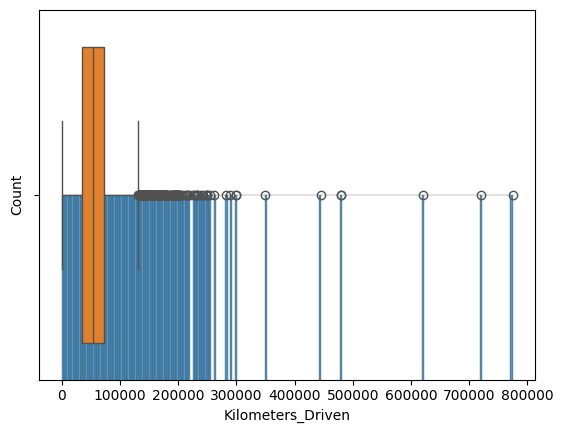

In [ ]:
# Plot histogram and box-plot for 'Kilometers_Driven'
sns.histplot(data=df,x='Kilometers_Driven')
sns.boxplot(data=df,x='Kilometers_Driven')


**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?

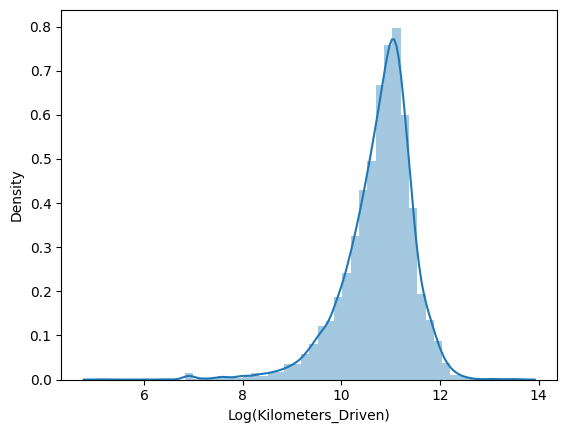

In [ ]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(df["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

after log transformation on kilometers driven now the data seems to be normally distributed and hence can be used in our model for predictions**Observations and Insights:

the data looks normally distributed under the bell

In [ ]:
# We can add a transformed kilometers_driven feature in data
df["kilometers_driven_log"] = np.log(df["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**.

<Axes: xlabel='Price'>

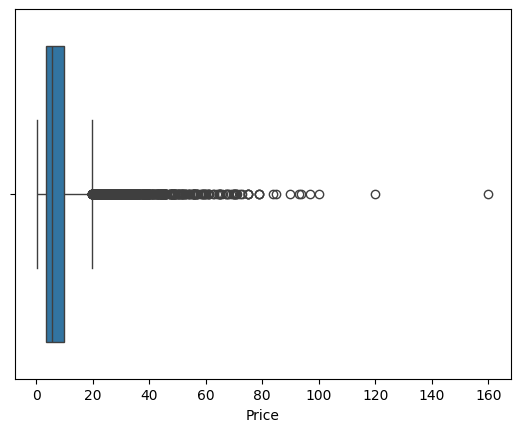

In [ ]:
# Plot histogram and box-plot for 'Price'
sns.boxplot(data=df,x='Price')

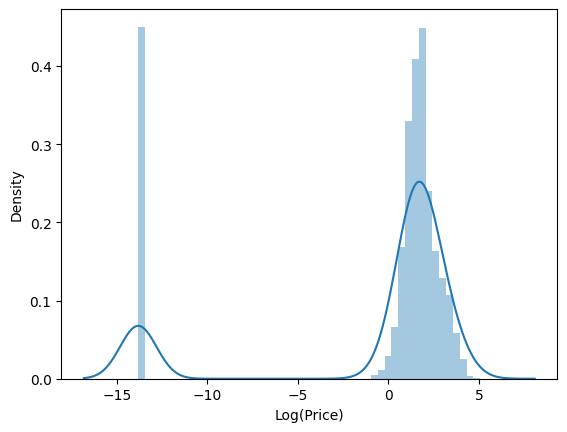

In [ ]:
# Log transformation of the feature 'Price'

import numpy as np
import pandas as pd
import seaborn as sns

# Replace zero or negative values with a small positive value (e.g., 1e-6)
df['Price'] = df['Price'].apply(lambda x: x if x > 0 else 1e-6)

# Log transformation of the feature 'Price'
sns.distplot(np.log(df['Price']), axlabel = "Log(Price)");
df["price_log"] = np.log(df["Price"])

In [ ]:
# We can Add a transformed Price feature in data
df["Price"] = np.log(df["Price"])
df.head()

,S_No,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,0.559616,11.184421,0.559616
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,2.525729,10.621327,2.525729
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,1.504077,10.736397,1.504077
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,1.791759,11.373663,1.791759
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,2.875822,10.613246,2.875822


**Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

**Observations and Insights for all the plots: _____**
few variables are highly skeweed so it would be better if we use thier log transformation in our model
Kilometers driven was right skewed so we applied log transformation to it which reduced it's skewness
same was the case with price so we added log price to our data Mileage seems to be normally distributed
Engine is little skewed, after applyng log transformation skewness is reduced. but we havent added it to our data set
same is the case with power

## **2. Univariate analysis - Categorical Data**

In [ ]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.


def perc_on_bar(data, z):
    '''
    plot
    data: DataFrame or Series
    z: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z])  # Length of the column
    plt.figure(figsize=(15, 5))
    ax = sns.countplot(data=data, x=z, palette='Paired', order=data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)  # Percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # Width of the plot
        y = p.get_y() + p.get_height()  # Height of the plot

        ax.annotate(percentage, (x, y), size=12, ha='center')  # Annotate the percentage with center alignment

    plt.show()

**Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.**

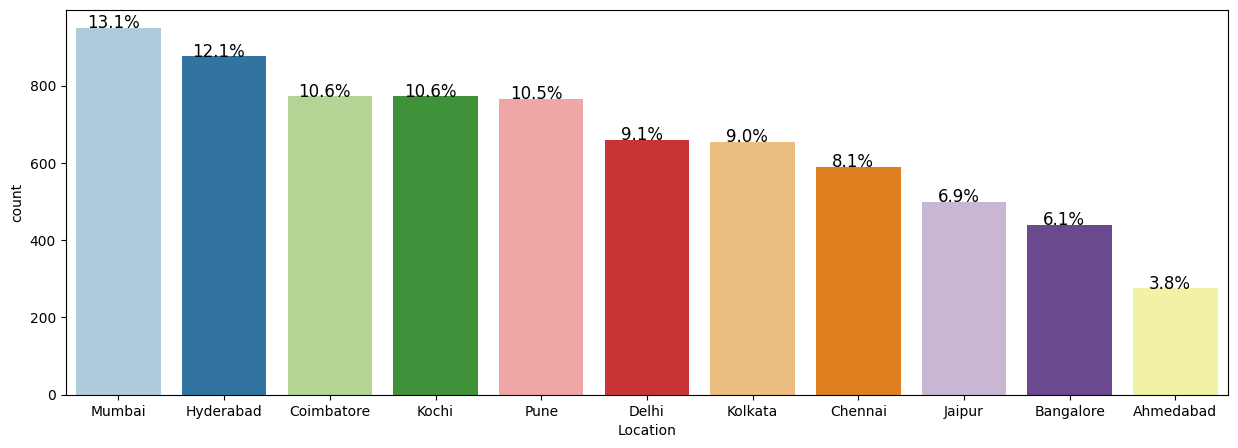

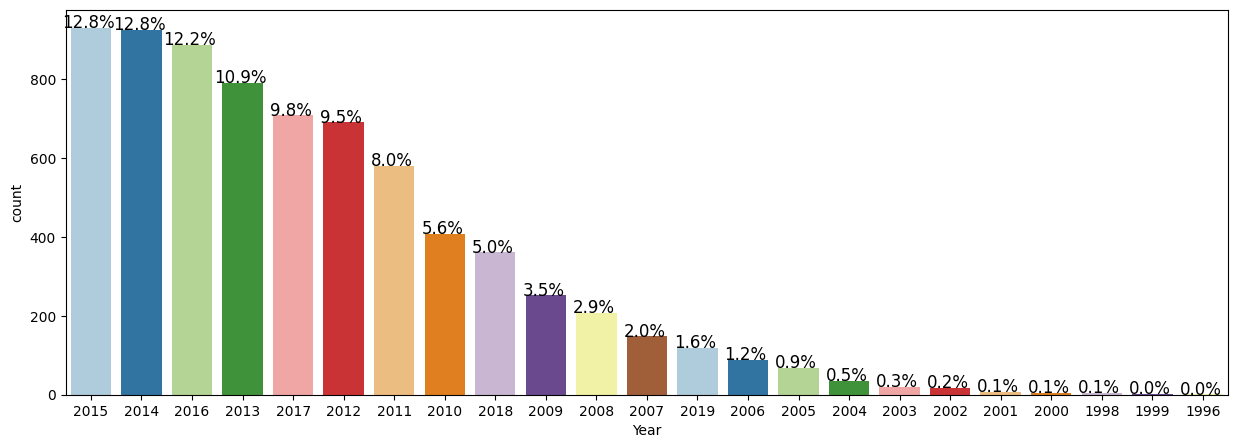

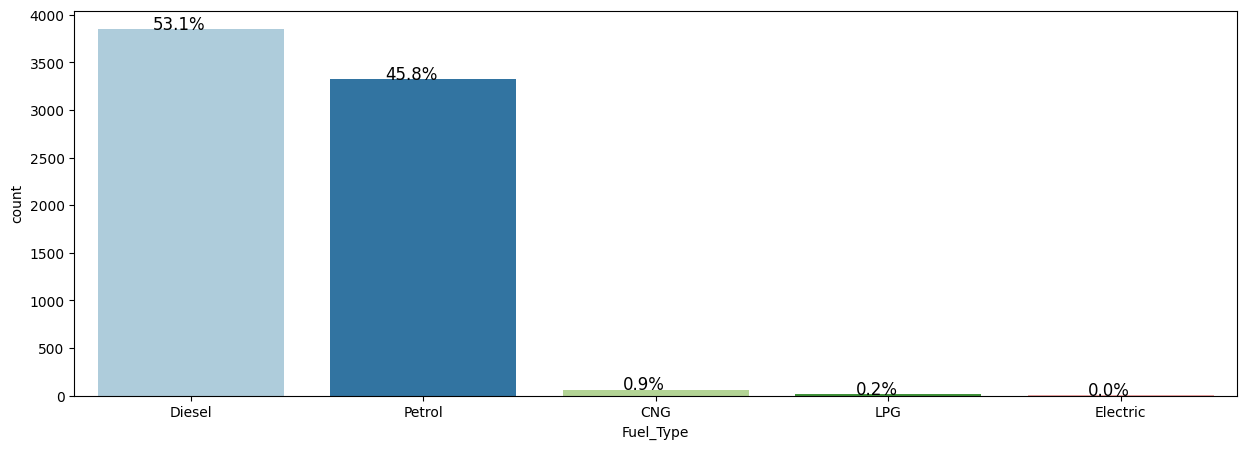

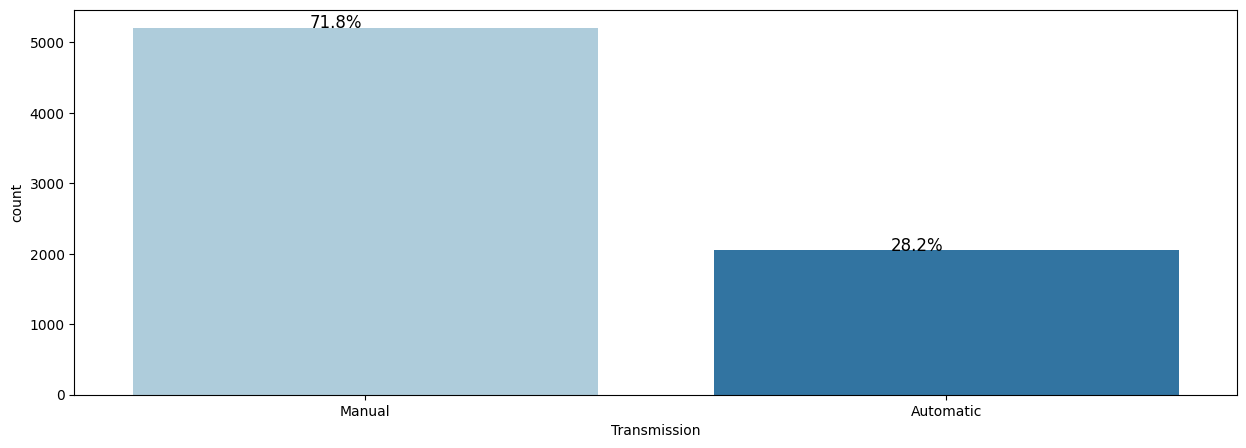

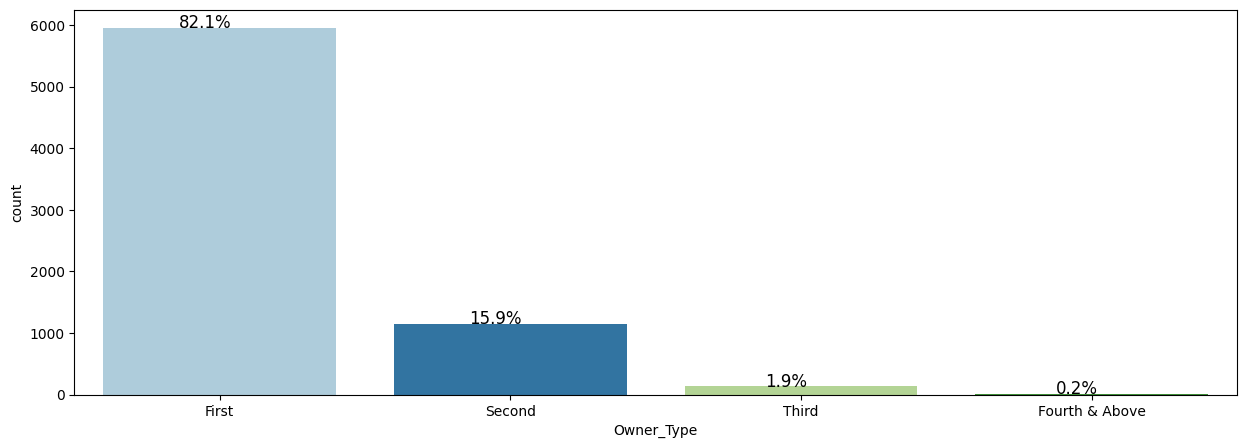

In [ ]:
# Bar Plot for 'Location'
perc_on_bar(df, 'Location')
perc_on_bar(df, 'Year')
perc_on_bar(df,'Fuel_Type')
perc_on_bar(df, 'Transmission')
perc_on_bar(df,'Owner_Type')

\**Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`.

**Observations and Insights from all plots: The most cars were bought in mumbia in 2015 and they are first time car buyers. These are munual cars that run on diseal.


From location plot we can see that we have 11 cities with Mumbai having maximum share of cars and Ahmedabad the least.
year of manufacture ranges from 1996 to 2015, wwe can observe that most of cars are new of past few years. years befor 2004 have negligible share.
Fuel type shows us that diesel and petrol are the two major players which was expected, Diesel being on top. CNG and LPG have little share while electric is at zero.
Transmission tells us that manual is still the prefered type with a huge share at 71.8%
Owner type has first owner at 82.1% share and second at 15.9%. which tells us that most of the cars are still with there first owner**

## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables.

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

,S_No,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,0.559616,11.184421,0.559616
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,2.525729,10.621327,2.525729
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,1.504077,10.736397,1.504077
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,1.791759,11.373663,1.791759
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,2.875822,10.613246,2.875822


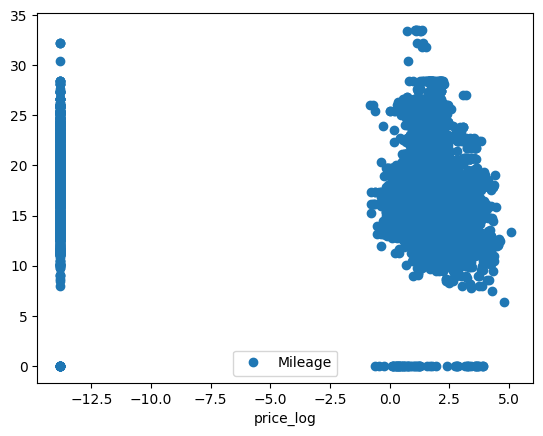

In [ ]:
# Let us plot pair plot for the variables 'year' and 'price_log'
df.plot(x = 'price_log', y = 'Mileage', style ='o')
df.head()

<b>Note:</b> Try to explore different combinations of independent variables and dependent variable. Understand the relationship between all variables.

**Observations and Insights from all plots:

As years increased price increased. It does not matter if the car was cheep or not. As price increased mileage decreased.


### **2. Heat map**
Heat map shows a 2D correlation matrix between two numerical features.

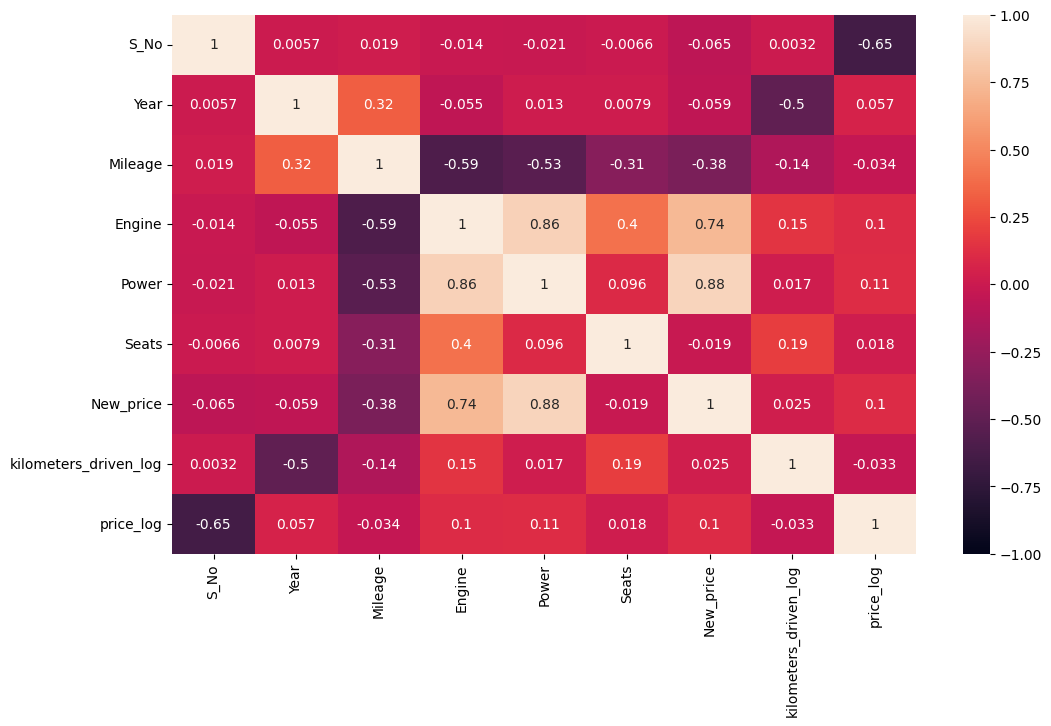

In [ ]:
# We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize = (12, 7))

# Correct the list of columns to drop

sns.heatmap(df.drop(['Kilometers_Driven','Price', 'Name','Location', 'Fuel_Type', 'Transmission','Owner_Type'],axis = 1).corr(), annot = True, vmin = -1, vmax = 1)

plt.show()

**Observations and Insights: Mileage and year are slightly positively correlated, which wouldd be due to technology advancement.
Kilometer driven log and years are negatively correlated which was observed in previous graphs also. Reason being new car having less time to be driven hence less kilometers.
Mileage is negatively correlated to Engine and Power, as both these factors increase fuel consumption increases.
Seats and Mileage are showing negative correlation, this could be understood by the fact that cars having more seats would be traveller cars and will give less mileage due to there size.
New price and Mileage are negatively correlated this could be due to two facts, sports cars and travellers both are expensive car and would have lesser Mileage.
New price and Price log are positively correlated as observed in earlier graphs due to same reason, a car with high retail price will have high price in used car market.
Power is highly positivly correlated with New price and Price log

### **3. Box plot**

In [ ]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):

    plt.figure(figsize = (12, 5)) # Setting size of boxplot

    sns.boxplot(x = z, y = df['Price']) # Defining x and y

    plt.show()

    plt.figure(figsize = (12, 5))

    plt.title('Without Outliers')

    sns.boxplot(x = z, y = df['Price'], showfliers = False) # Turning off the outliers

    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

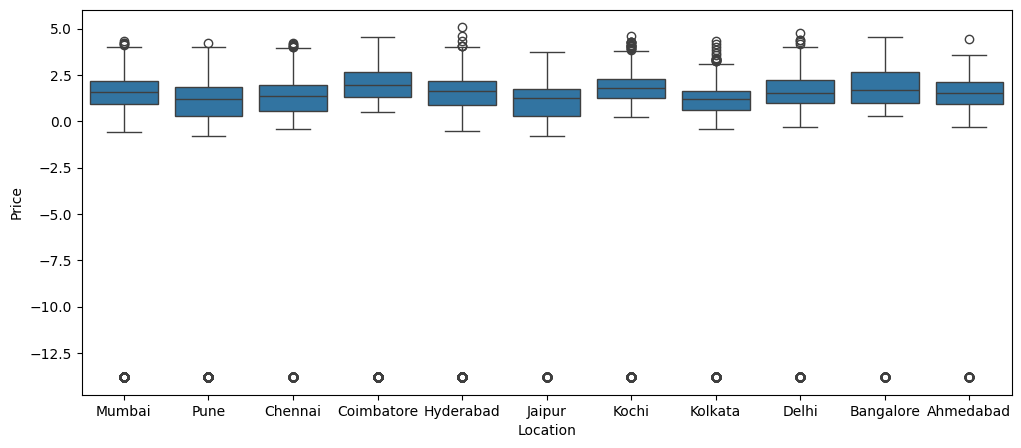

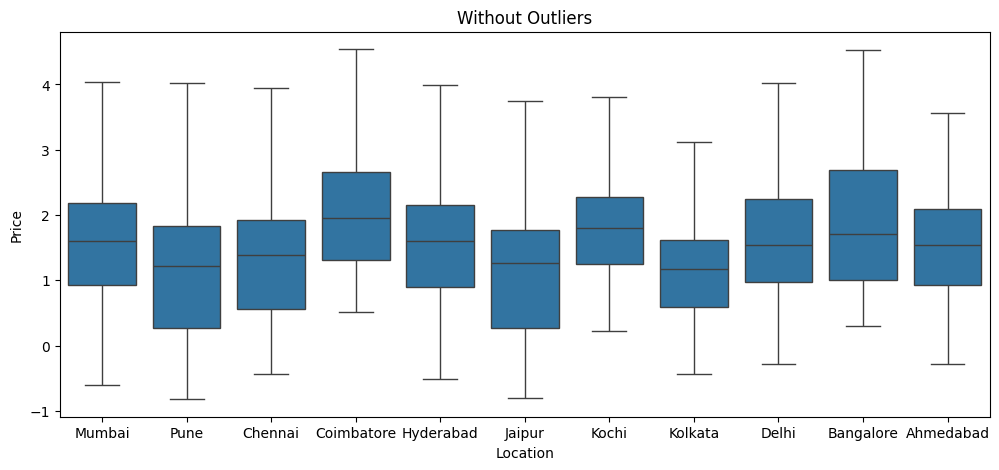

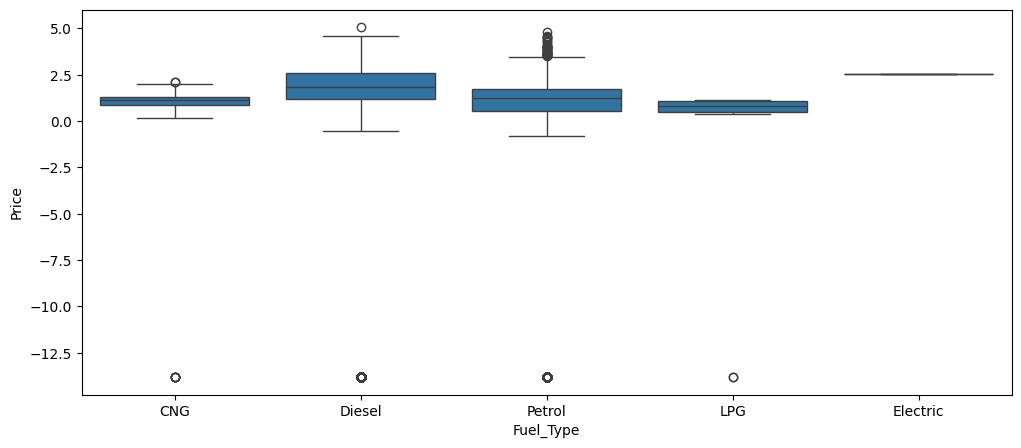

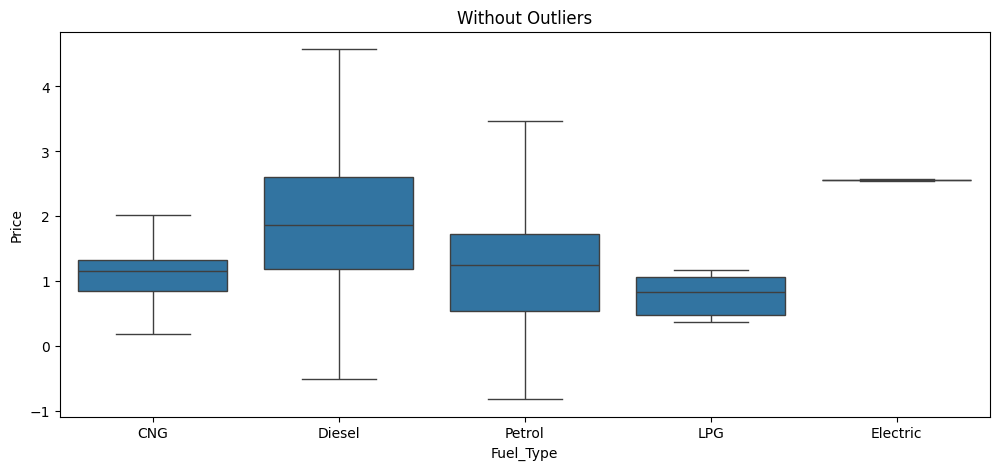

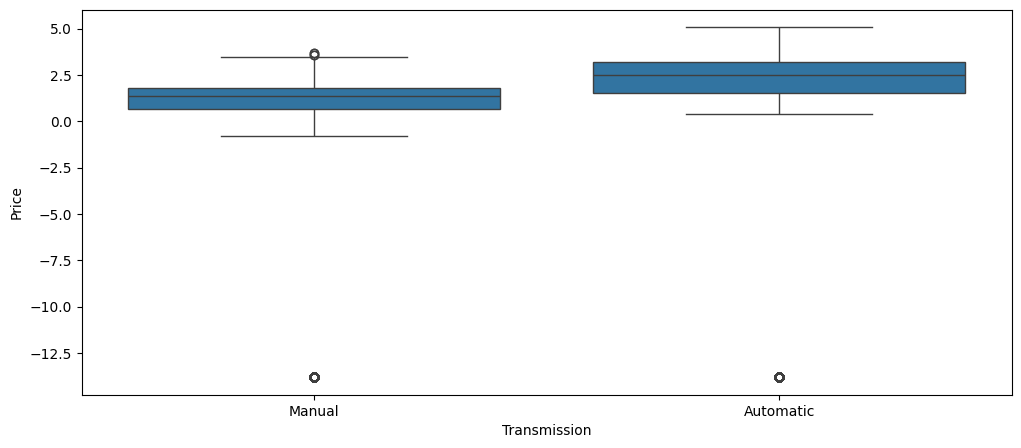

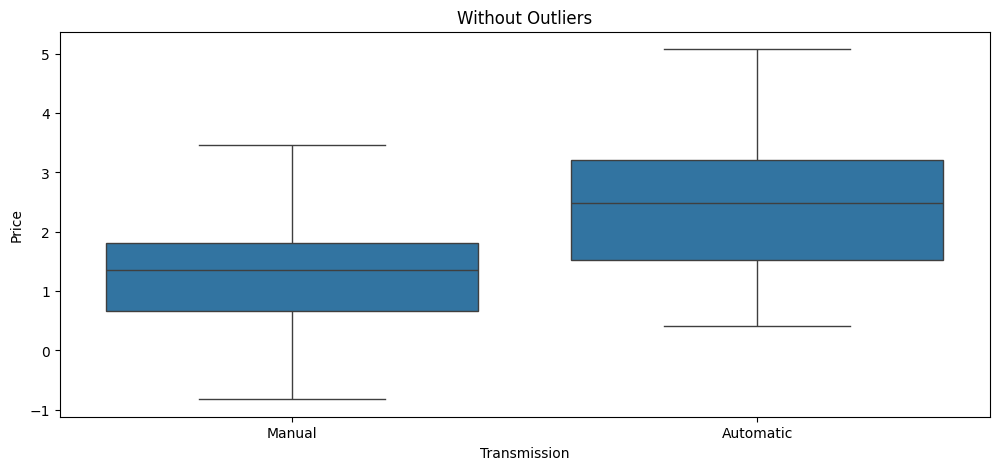

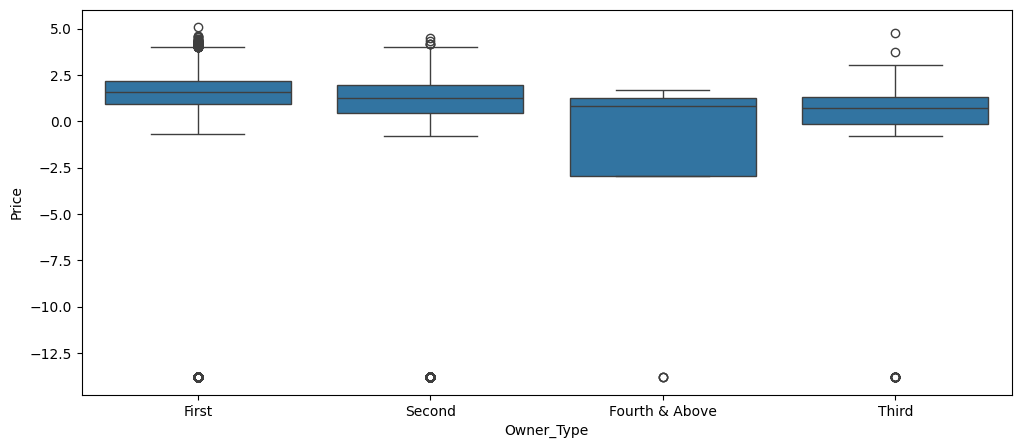

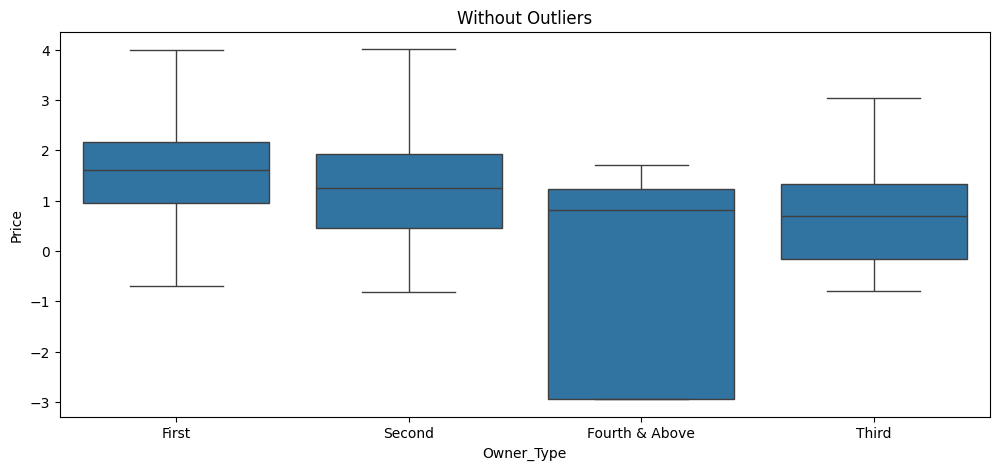

In [ ]:
# Box Plot: Price vs Location
boxplot(df['Location'])
boxplot(df['Fuel_Type'])
boxplot(df['Transmission'])
boxplot(df['Owner_Type'])



<b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

**Observations and Insights for all plots:

Coimbatore and Banglore have the higherst priced cars.

### **Feature Engineering**

# **Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column?

In [ ]:
df["Name"].nunique()

2041

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [ ]:
# Extract Brand Names
df["Brand"] = df["Name"].apply(lambda x: x.split(" ")[0].lower())

In [ ]:
# Extract Model Names
df["Model"] = df["Name"].apply(lambda x: x.split(" ")[0].lower())
df.head()



,S_No,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,0.559616,11.184421,0.559616,maruti,maruti
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,2.525729,10.621327,2.525729,hyundai,hyundai
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,1.504077,10.736397,1.504077,honda,honda
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,1.791759,11.373663,1.791759,maruti,maruti
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,2.875822,10.613246,2.875822,audi,audi


#### **Observations and Insights: _____**

In [ ]:
df["Brand"]. value_counts ()

Brand
maruti           1444
hyundai          1340
honda             743
toyota            507
mercedes-benz     380
volkswagen        374
ford              351
mahindra          331
bmw               311
audi              285
tata              228
skoda             202
renault           170
chevrolet         151
nissan            117
land               67
jaguar             48
fiat               38
mitsubishi         36
mini               31
volvo              28
porsche            19
jeep               19
datsun             17
isuzu               5
force               3
bentley             2
smart               1
ambassador          1
lamborghini         1
hindustan           1
opelcorsa           1
Name: count, dtype: int64

### **Missing value treatment**

In [ ]:
# Now check the missing values of each column. Hint: Use isnull() method
df.isnull()

,S_No,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
7249,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
7250,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
7251,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


#### **Observations and Insights: _____**

**Missing values in Seats**

In [ ]:
# Checking missing values in the column 'Seats'
print("Missing values in Seats is:",df["Seats"].isnull().sum())

Missing values in Seats is: 53


**Think about it:** Can we somehow use the extracted information from 'Name' column to impute missing values?

**Hint:** Impute these missing values one by one, by taking median number of seats for the particular car, using the Brand and Model name.


In [ ]:
# Impute missing values in Seats,you can use fillna method in pandas
df['Seats'] = df["Seats"].fillna(df["Seats"].median())

In [ ]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
print("Missing values in Seats is:",df["Seats"].isnull().sum())

Missing values in Seats is: 0


**Missing values for Mileage**

In [ ]:
# Now check missing values of each column. Hint: Use isnull() method

print("Missing values in Mileage is:",df["Mileage"].isnull().sum())

Missing values in Mileage is: 2


In [ ]:
# Impute missing Mileage. For example, use can use median or any other methods.
df['Mileage'] = df["Mileage"].fillna(df["Mileage"].median())

In [ ]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
print("Missing values in Mileage is:",df["Mileage"].isnull().sum())

Missing values in Mileage is: 0


**Missing values for Engine**

In [ ]:
# Impute missing values in the column Engine
print("Missing values in Engine is:",df["Engine"].isnull().sum())
df['Engine'] = df["Engine"].fillna(df["Engine"].median())

Missing values in Engine is: 46


**Missing values for Power**

In [ ]:
# Impute missing values in the column Power
df['Power'] = df["Power"].fillna(df["Power"].median())
print("Missing values in Power is:",df["Power"].isnull().sum())


Missing values in Power is: 0


# **Missing values for New_price**

In [ ]:
# Drop the rows where 'Price' == NaN

In [ ]:
# Impute missing values in the column New_price
df['New_price'] = df.New_price.fillna(df.New_price.median())
print("Missing values in New_price is:",df['New_price'].isnull().sum())


Missing values in New_price is: 0


In [ ]:
# Check the null values in the data
df['New_price'] = df.groupby(['Name'])['New_price'].transform(lambda x: x.fillna(x.median()))



**Observations for missing values after imputing: _____**

We have imputed values for all the columns except New_price and price
For New price we have imputed partially
As we furthure can't impute values and null values will effect performance of model so we have to drop the rows with null values.

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

## **Building Various Models**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name.
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y).
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Think about it:** Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

In [ ]:
# Step-1
df.head()
X = df.drop(columns=['Name','Price','Kilometers_Driven'])

y = df[['Price']]

In [ ]:
F# Step-2 Use pd.get_dummies(drop_first = True)
X = pd.get_dummies(X, drop_first = True)
X=X.applymap(lambda x: 1 if x is True else (0 if x is False else x))

In [ ]:
X

,S_No,Year,Mileage,Engine,Power,Seats,New_price,kilometers_driven_log,price_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,Brand_fiat,Brand_force,Brand_ford,Brand_hindustan,Brand_honda,Brand_hyundai,Brand_isuzu,Brand_jaguar,Brand_jeep,Brand_lamborghini,Brand_land,Brand_mahindra,Brand_maruti,Brand_mercedes-benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_opelcorsa,Brand_porsche,Brand_renault,Brand_skoda,Brand_smart,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo,Model_audi,Model_bentley,Model_bmw,Model_chevrolet,Model_datsun,Model_fiat,Model_force,Model_ford,Model_hindustan,Model_honda,Model_hyundai,Model_isuzu,Model_jaguar,Model_jeep,Model_lamborghini,Model_land,Model_mahindra,Model_maruti,Model_mercedes-benz,Model_mini,Model_mitsubishi,Model_nissan,Model_opelcorsa,Model_porsche,Model_renault,Model_skoda,Model_smart,Model_tata,Model_toyota,Model_volkswagen,Model_volvo
0,0,2010,26.60,998.0,58.16,5.0,11.57,11.184421,0.559616,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2015,19.67,1582.0,126.20,5.0,11.57,10.621327,2.525729,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2011,18.20,1199.0,88.70,5.0,8.61,10.736397,1.504077,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,2012,20.77,1248.0,88.76,7.0,11.57,11.373663,1.791759,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,2013,15.20,1968.0,140.80,5.0,11.57,10.613246,2.875822,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,2011,20.54,1598.0,103.60,5.0,11.57,11.400999,-13.815511,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7249,7249,2015,17.21,1197.0,103.60,5.0,11.57,10.985293,-13.815511,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7250,7250,2012,23.08,1461.0,63.10,5.0,11.57,10.239960,-13.815511,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7251,7251,2013,17.20,1197.0,103.60,5.0,11.57,10.864025,-13.815511,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Step-3 Splitting data into training and test set:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print(X_train.shape, X_test.shape)

(5076, 89) (2176, 89)


In [ ]:
# Let us write a function for calculating r2_score and RMSE on train and test data
# This function takes model as an input on which we have trained particular algorithm
# The categorical column as the input and returns the boxplots and histograms for the variable

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)

    pred_train_ = np.exp(pred_train)

    pred_test = model.predict(X_test)

    pred_test_ = np.exp(pred_test)

    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)

    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)

    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)

    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)

    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))

    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True:

        print("R-sqaure on training set : ", metrics.r2_score(y_train['Price'], pred_train_))

        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))

        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))

        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))

    # Returning the list with train and test scores
    return score_list

<hr>

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Fitting a linear model**

Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [ ]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
# Create a linear regression model
lr = LinearRegression()

In [ ]:
# Fit linear regression model

# Check if 'price_log' exists, else use 'Price'
if 'price_log' in y_train.columns:
    lr.fit(X_train, y_train['price_log'])
else:
    lr.fit(X_train, y_train['Price'])
    print("Warning: Using 'Price' column as 'price_log' was not found.")

print(y_train.columns)

Index(['Price'], dtype='object')


In [ ]:
# Fit linear regression model

lr.fit(X_train, y_train['Price'])
print(y_train.columns)

Index(['Price'], dtype='object')


In [ ]:
# Get score of the model
from sklearn.linear_model import LinearRegression
from sklearn import metrics

LR_score = get_model_score(lr)

R-sqaure on training set :  -3.82694365155392
R-square on test set :  -3.973946332521429
RMSE on training set :  13.077084202510278
RMSE on test set :  13.114238018175751


**Observations from results: _____**

**Important variables of Linear Regression**

Building a model using statsmodels.

In [ ]:
# Import Statsmodels
import statsmodels.api as sm
import pandas as pd # Import pandas for data manipulation

# Statsmodel api does not add a constant by default. We need to add it explicitly
X_train = sm.add_constant(X_train)

# Add constant to test data
X_test = sm.add_constant(X_test)

def build_ols_model(train):
    # Ensure your target variable is numeric
    y_train["Price"] = pd.to_numeric(y_train["Price"], errors='coerce') # Convert to numeric, replace non-convertibles with NaN

    # Create the model
    olsmodel = sm.OLS(y_train["Price"], train) # Use x_train, not 'train'

    return olsmodel.fit()



In [ ]:
X_train

,const,S_No,Year,Mileage,Engine,Power,Seats,New_price,kilometers_driven_log,price_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,Brand_fiat,Brand_force,Brand_ford,Brand_hindustan,Brand_honda,Brand_hyundai,Brand_isuzu,Brand_jaguar,Brand_jeep,Brand_lamborghini,Brand_land,Brand_mahindra,Brand_maruti,Brand_mercedes-benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_opelcorsa,Brand_porsche,Brand_renault,Brand_skoda,Brand_smart,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo,Model_audi,Model_bentley,Model_bmw,Model_chevrolet,Model_datsun,Model_fiat,Model_force,Model_ford,Model_hindustan,Model_honda,Model_hyundai,Model_isuzu,Model_jaguar,Model_jeep,Model_lamborghini,Model_land,Model_mahindra,Model_maruti,Model_mercedes-benz,Model_mini,Model_mitsubishi,Model_nissan,Model_opelcorsa,Model_porsche,Model_renault,Model_skoda,Model_smart,Model_tata,Model_toyota,Model_volkswagen,Model_volvo
62,1.0,62,2015,11.74,1796.0,186.00,5.0,11.57,10.968198,3.284664,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3018,1.0,3018,2015,15.60,1196.0,70.00,5.0,11.57,9.971146,1.386294,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3503,1.0,3503,2016,18.15,1198.0,82.00,6.0,11.57,10.086850,1.410987,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2156,1.0,2156,2014,12.99,2494.0,100.60,7.0,11.57,11.562135,2.374906,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3863,1.0,3863,2015,15.10,2179.0,140.00,7.0,11.57,10.579870,2.536075,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1.0,905,2008,19.30,1248.0,73.90,5.0,11.57,11.418615,1.047319,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5193,1.0,5193,2014,24.00,1120.0,70.00,5.0,11.57,11.277203,1.423108,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3981,1.0,3981,2016,22.77,1498.0,98.59,5.0,11.57,10.512655,2.174752,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
235,1.0,235,2019,11.36,2755.0,171.50,7.0,20.74,9.558529,2.977568,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
#y_train

y_train["Price"] = pd.to_numeric(y_train["Price"], errors='coerce') # Convert to numeric, replace non-convertibles with NaN
# Create the model
X_train = X_train.apply(pd.to_numeric, errors='coerce')
olsmodel = sm.OLS(y_train["Price"], X_train) # Use x_train, not 'train'


In [ ]:
# Retrive Coeff values, p-values and store them in the dataframe
# Call the function to build the OLS mod
olsmodel1 = build_ols_model(X_train.copy()) # Pass a copy to avoid modifying original
olsmod = pd.DataFrame(olsmodel1.params, columns=['coef'])
olsmod['pval'] = olsmodel1.pvalues
olsmod['pval'] = np.asarray(olsmodel1.pvalues, dtype=np.float64)
olsmod['std_err'] = olsmodel1.bse

In [ ]:
# We are looking are overall significant varaible

pval_filter = olsmod['pval']<= 0.05
imp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in df.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)


start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical varaibles of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Engine', 'New_price', 'kilometers_driven_log', 'price_log', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand']


**Build Ridge / Lasso Regression similar to Linear Regression:**<br>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [ ]:
# Import Ridge/ Lasso Regression from sklearn
from sklearn.linear_model import Ridge, Lasso

In [ ]:
# Create a Ridge regression model
ridge = Ridge(alpha=1.0)

In [ ]:
# Fit Ridge regression model
ridge.fit(X_train,y_train['Price'])

In [ ]:
# Get score of the model
ridge_score = get_model_score(ridge)

**Observations from results: _____**

### **Decision Tree**

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [ ]:
# Import Decision tree for Regression from sklearn
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Create a decision tree regression model, use random_state = 1
dtree = DecisionTreeRegressor(random_state = 1)

In [ ]:
# Fit decision tree regression model
dtree.fit(X_train, y_train['Price'])

DecisionTreeRegressor(random_state=1)

In [ ]:
# Get score of the model
Dtree_model = get_model_score(dtree)

R-sqaure on training set :  -3.826943651555017
R-square on test set :  -3.8957235055174353
RMSE on training set :  13.077084202511763
RMSE on test set :  13.01070875539134


**Observations from results: _____**

Print the importance of features in the tree building. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.


In [ ]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
price_log              9.999986e-01
New_price              1.290175e-06
kilometers_driven_log  2.797538e-08
Mileage                2.532527e-08
S_No                   1.577478e-08
...                             ...
Model_bentley          0.000000e+00
Model_datsun           0.000000e+00
Model_volvo            0.000000e+00
Model_nissan          -7.408329e-21
Brand_mitsubishi      -2.469443e-20

[90 rows x 1 columns]


**Observations and insights: _____**

### **Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
# Import Randomforest for Regression from sklearn
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Create a Randomforest regression model

clf = RandomForestRegressor(n_estimators=100)

In [ ]:
# Fit Randomforest regression model
clf.fit(X_train, y_train['Price'])

RandomForestRegressor()

In [ ]:
# Get score of the model
clf_model = get_model_score(clf)

R-sqaure on training set :  -3.783455187185087
R-square on test set :  -3.9408361440010022
RMSE on training set :  13.018041763981111
RMSE on test set :  13.07051620340707


**Observations and insights: _____**

**Feature Importance**

In [ ]:
# Print important features similar to decision trees
print(pd.DataFrame(clf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                             Imp
price_log           9.999984e-01
New_price           7.737643e-07
Location_Hyderabad  1.764755e-07
Mileage             1.750743e-07
Power               1.006856e-07
...                          ...
Brand_force         0.000000e+00
Brand_hindustan     0.000000e+00
Model_lamborghini   0.000000e+00
Brand_lamborghini   0.000000e+00
Model_force        -2.526043e-22

[90 rows x 1 columns]


**Observations and insights: _____**

### **Hyperparameter Tuning: Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, make_scorer
# Choose the type of estimator
dtree_tuned = DecisionTreeRegressor(random_state = 1)(random_state = 1)

# Grid of parameters to choose from
# Check documentation for all the parametrs that the model takes and play with those
parameters = {{ 'splitter':["best","random"],
    'max_depth': [1, 3, 5, 7, 9, 11, 12, 15],
    'min_samples_leaf': [5, 10, 20, 25]
    }}

# Type of scoring used to compare parameter combinations
scorer = 'neg_mean_squared_error'

# Run the grid search
grid_obj = GridSearchCV(estimator=dtree_tuned,param_grid=parameters,
                        cv=10, verbose=1, scoring = scorer)
grid_obj = grid_obj.fit(X_train,y_train)
dtree_tuned = grid_obj.best_estimator_
# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train,y_train['Price'])

TypeError: 'DecisionTreeRegressor' object is not callable

In [ ]:
# Get score of the dtree_tuned
Dtree_model_tuned = get_model_score(dtree_tuned)

**Observations and insights: _____**

**Feature Importance**

In [ ]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

**Observations and insights: _____**

### **Hyperparameter Tuning: Random Forest**

In [ ]:
# Choose the type of Regressor
randomforest_tuned = RandomForestRegressor(random_state=1)

# Define the parameters for Grid to choose from
# Check documentation for all the parametrs that the model takes and play with those
parameters={'max_depth': [1, 2, 3, 5, 7, 9, 10, 11, 12],
    'min_samples_leaf': [5, 10, 20, 25]
  }

# Type of scoring used to compare parameter combinations
scorer = 'neg_mean_squared_error'
# Run the grid search
grid_obj = GridSearchCV(estimator=randomforest_tuned,param_grid=parameters,
                        cv=10, verbose=1, scoring = scorer)
grid_obj = grid_obj.fit(X_train,y_train)

# Set the model to the best combination of parameters
randomforest_tuned=grid_obj.best_estimator_

# Fit the best algorithm to the data
randomforest_tuned.fit(X_train,y_train['Price'])

Fitting 10 folds for each of 36 candidates, totalling 360 fits


RandomForestRegressor(max_depth=11, min_samples_leaf=5, random_state=1)

In [ ]:
# Get score of the model
randomforest_tuned_model = get_model_score(randomforest_tuned)

R-sqaure on training set :  -3.762336740789925
R-square on test set :  -3.9396638580157974
RMSE on training set :  12.989273340883605
RMSE on test set :  13.068965525395189


**Observations and insights: _____**

**Feature Importance**

In [ ]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(randomforest_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
price_log              9.999999e-01
Engine                 5.160145e-08
kilometers_driven_log  1.639666e-08
S_No                   1.601244e-08
Mileage                1.558411e-08
...                             ...
Brand_renault          0.000000e+00
Brand_smart            0.000000e+00
Brand_tata             0.000000e+00
Model_volvo            0.000000e+00
Brand_skoda           -9.891466e-23

[90 rows x 1 columns]


**Observations and insights: ______**

**Observations: _____**

**Note:** You can also try some other algorithms such as KNN and compare the model performance with the existing ones.

## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

In [ ]:
# Defining list of models you have trained
models = [lr, olsmodel1, ridge, lasso, knn, dtree,clf, dtree_tuned, randomforest_tuned ]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Looping through all the models to get the rmse and r2 scores
for model in models:

    # Accuracy score
    j = get_model_score(model, False)

    r2_train.append(j[0])

    r2_test.append(j[1])

    rmse_train.append(j[2])

    rmse_test.append(j[3])

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Decision Tree', ___________, ___________],
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE': rmse_train,'Test_RMSE': rmse_test})
comparison_frame

**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt? What are expected benefits and costs (assume numbers) of this solution design?